In [65]:
# Bar graph mean load time + level time for each CPU + clock speed
# Load time vs Iteration / each CPU a different color
# Level time vs Iteration / each CPU a different color

In [70]:
import pandas as pd

i77gen = 'metrics_12-09-21_05-25-06_i7-7700K.json'
i59gen = 'metrics_12-09-21_07-58-48_i7-9300H.json'
i710gen ='metrics_12-09-21_06-17-06_i7-10750H.json'
i56500 = 'metrics_12-09-21_18-17-34_i5-6500.json'
i57600 = 'metrics_12-09-21_19-02-38_i5-7600.json'

i77gen = {
    'data': pd.read_json('../data/interim/' + i77gen),
    'cpu': i77gen,
    'clock': '4.7GHz'
}
i59gen = {
    'data': pd.read_json('../data/interim/' + i59gen),
    'cpu': i59gen,
    'clock': '3.5GHz'
}
i710gen = {
    'data': pd.read_json('../data/interim/' + i710gen),
    'cpu': i710gen,
    'clock': '4GHz'
}

i56500 = {
    'data': pd.read_json('../data/interim/' + i56500),
    'cpu': i56500,
    'clock': '3.2GHz'
}

i57600 = {
    'data': pd.read_json('../data/interim/' + i57600),
    'cpu': i57600,
    'clock': '3.5GHz'
}


cpus = [i710gen, i77gen, i59gen, i56500, i57600]

data = {
    'label': [],
    'load': [],
    'level': [],
    'level_series': [],
    'load_series': [],
    'clock': [],
    'bar_label': []
}
for cpu in cpus:
    name = cpu['cpu'].split('.')[0].split('_')[-1]
    data['clock'].append(cpu['clock'])
    data['bar_label'].append(name + '\n' + cpu['clock'])
    level = cpu['data']['level'].mean()
    load = cpu['data']['load'].mean()
    data['label'].append(name)
    data['level'].append(level)
    data['load'].append(load)
    data['level_series'].append(cpu['data']['level'])
    data['load_series'].append(cpu['data']['load'])
    print(name, level, load)

i7-10750H 4.029010319699999 16.21684793234
i7-7700K 7.830114889149999 15.813411080840002
i7-9300H 42.189030230045 29.00213013887
i5-6500 29.46266843080499 22.74666900634
i5-7600 32.58802577258 19.341497242455


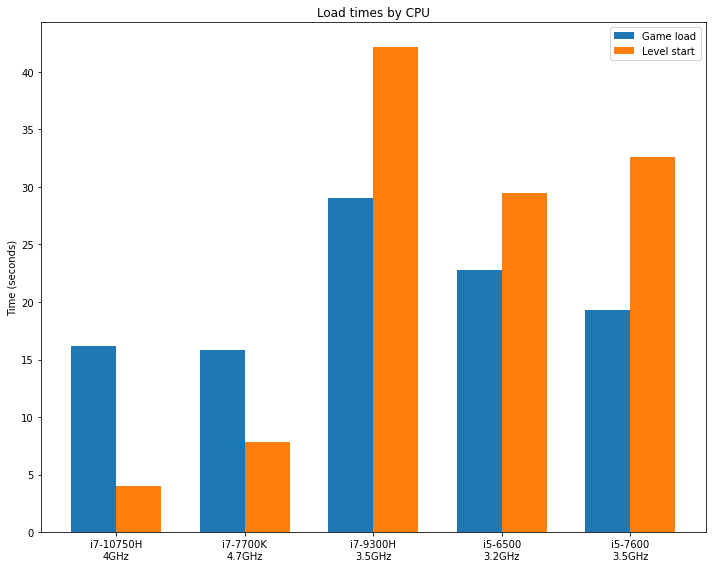

In [71]:
import matplotlib.pyplot as plt
import numpy as np

title = 'Load times by CPU'

x = np.arange(len(data['label']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(x - width/2, data['load'], width, label='Game load')
ax.bar(x + width/2, data['level'], width, label='Level start')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (seconds)')
ax.set_title(title)
ax.set_xticks(x, data['bar_label'])
ax.legend()

fig.tight_layout()
plt.savefig(title + '.png')


plt.show()

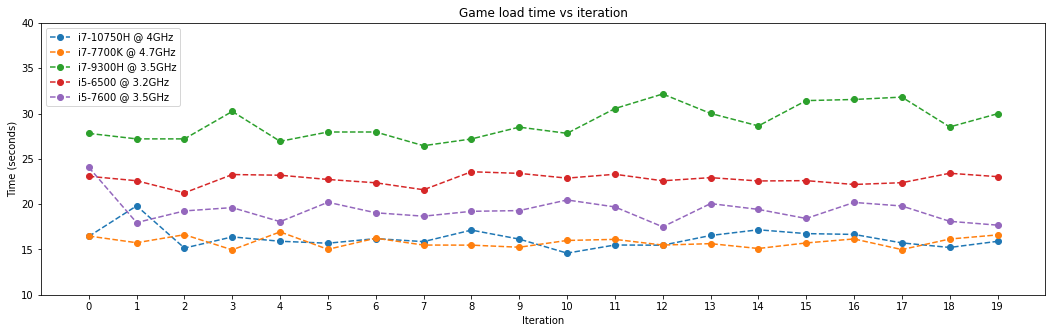

In [72]:
title = 'Game load time vs iteration'

plt.figure(figsize=(18, 5))

plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title(title)
for (load_series_cpu, label, clock) in zip(data['load_series'], data['label'], data['clock']):
    plt.plot(range(len(load_series_cpu)), load_series_cpu, 'o--', label=label + ' @ ' + clock)
plt.legend()

plt.xlim(-1, 20)
plt.ylim(10, 40)
plt.xticks(range(len(load_series_cpu)))
plt.savefig(title + '.png')


plt.show()

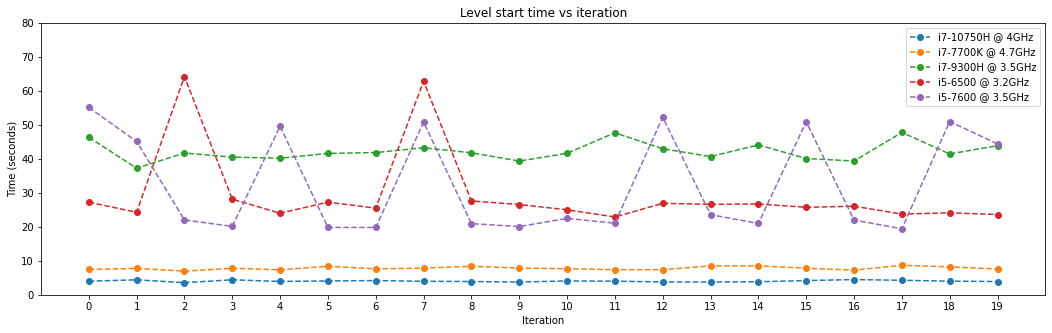

In [73]:
title = 'Level start time vs iteration'

plt.figure(figsize=(18, 5))

plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title(title)
for (level_series_cpu, label, clock) in zip(data['level_series'], data['label'], data['clock']):
    plt.plot(range(len(level_series_cpu)), level_series_cpu, 'o--', label=label + ' @ ' + clock)
plt.legend()

plt.xlim(-1, 20)
plt.ylim(0, 80)
plt.xticks(range(len(load_series_cpu)))
plt.savefig(title + '.png')


plt.show()